# LearnPlatform COVID-19 Impact on Digital Learning
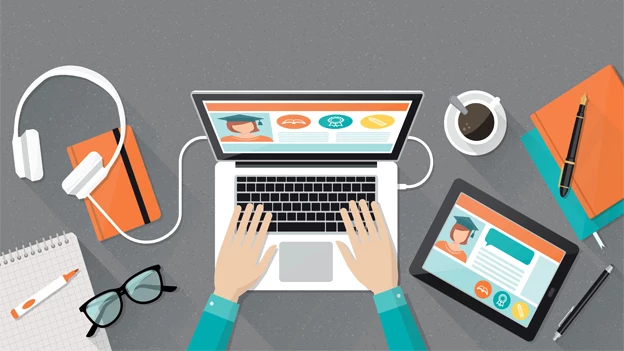

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
from plotly.offline import iplot


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Understanding the DISTRICT DATA

The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab. In this data set, we removed the identifiable information about the school districts. We also used an open source tool ARX (Prasser et al. 2020) to transform several data fields and reduce the risks of re-identification. For data generalization purposes some data points are released with a range where the actual value falls under. Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset.

**district_id** : The unique identifier of the school district

**state** : The state where the district resides in

**locale** : NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information.

**pct_black/hispanic** : Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data

**pct_free/reduced** : Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data

**countyconnectionsratio** : ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.

**pptotalraw** : Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

# Exploratory data analysis on District Data

In [ ]:
#import dataset

df = pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')
df.head()

rows and column in district dataset

In [ ]:
df.shape

dataset summary

In [ ]:
df.describe()

In [ ]:
df.info()

check null vlaues

In [ ]:
df.isnull().sum()

columns in dataset

In [ ]:
df.nunique()

In [ ]:
df.columns

check datatypes of column

In [ ]:
df.dtypes

Delete duplicates 

In [ ]:
df = df.drop_duplicates()

# Univariate Analysis

Distribution of state

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df.state)
plt.xticks(rotation=90)

In [ ]:
df['state'].value_counts().head(10).plot(kind='pie',
                                        autopct='%1.1f%%',
                                         figsize=(10,10),
                                        startangle=0).legend()

In [ ]:
cloud = WordCloud(width=1440, height=1000).generate(" ".join(df['state'].dropna().astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

Distribution of locale

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df.locale)

In [ ]:
df['locale'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), startangle=0).legend()

county_connections_ratio

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df.county_connections_ratio)

In [ ]:
df.to_csv('./output.csv')